In [ ]:
from google.colab import files
uploaded = files.upload()

Saving daily-minimum-temperatures-in-me.csv to daily-minimum-temperatures-in-me.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MaunaLoaDailyTemps.csv to MaunaLoaDailyTemps.csv


In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 4.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.0MB/s 
     |████████████████████████████████| 2.1MB 14.0MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
df= pd.read_csv('daily-minimum-temperatures-in-me.csv',index_col=0,names=['Date','temp'])
df.head()

,temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
x=df.values

In [ ]:
print(x)

[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


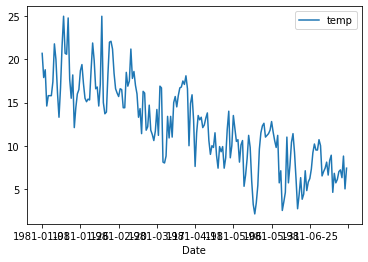

In [ ]:
df[:200].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['temp'])

1. ADF :  -4.4448049246117
2. P-Value :  0.0002470826300360994
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 3629
5. Critical Values :
	 1% :  -3.4321532327220154
	 5% :  -2.862336767636517
	 10% :  -2.56719413172842


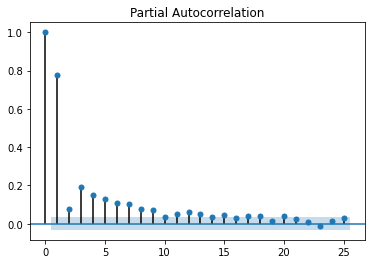

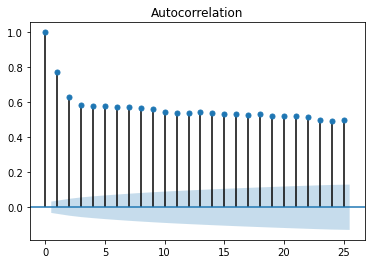

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

pacf=plot_pacf(df['temp'],lags=25)
acf=plot_acf(df['temp'],lags=25)

In [ ]:
train = x[:len(df)-7]
test = x[len(df)-7:]

In [ ]:
train.shape

(3643, 1)

In [ ]:
test.shape

(7, 1)

In [ ]:
train[:10]

array([[20.7],
       [17.9],
       [18.8],
       [14.6],
       [15.8],
       [15.8],
       [15.8],
       [17.4],
       [21.8],
       [20. ]])

In [ ]:
model=AutoReg(train,lags=10).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [ ]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sun, 21 Feb 2021   AIC                              1.780
Time:                        02:10:23   BIC                              1.800
Sample:                            10   HQIC                             1.787
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [ ]:
pred=model.predict(start=len(train),end=len(x)-1,dynamic=False)

In [ ]:
print(pred)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


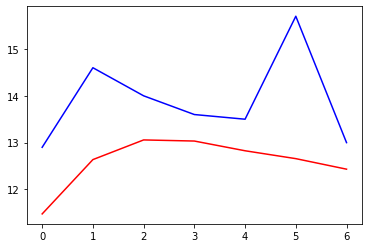

In [ ]:
from matplotlib import pyplot
pyplot.plot(pred,color='red')
pyplot.plot(test,color='blue')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(test,pred)))

1.5638196220860587


In [ ]:
pred_future = model.predict(start=len(x)+1,end=len(x)+7,dynamic=False)

In [ ]:
print(pred_future)

[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]


In [ ]:
print(len(pred_future))

7


In [ ]:
df1=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df1=df1.dropna()

In [ ]:
df1.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
df1.shape

(1821, 5)

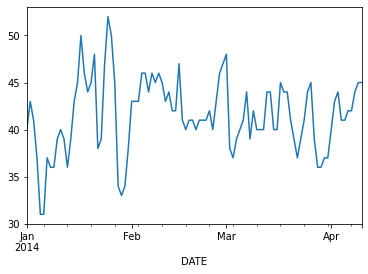

In [ ]:
df1['AvgTemp'][:100].plot()

In [ ]:
adf_test(df1['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(df1['AvgTemp'], trace=True,suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.65 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.77 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.50 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.42 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.69 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.29 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=5.00 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.480
Date:                Sun, 21 Feb 2021   AIC                           8294.960
Time:                        02:40:59   BIC                           8339.017
Sample:                             0   HQIC                          8311.213
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2633      0.374      3.377      0.001       0.530       1.996
ar.L1          0.9729      0.008    120.958      0.000       0.957       0.989
ma.L1         -0.1266      0.024     -5.344      0.000      -0.173      -0.080
ma.L2         -0.2167      0.024     -8.987      0.000      -0.264      -0.169
ma.L3         -0.2038      0.024     -8.546      0.000      -0.251      -0.157
ma.L4         -0.1400      0.023     -6.164      0.000      -0.184      -0.095
ma.L5         -0.0471      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4837      0.171     32.032      0.000       5.148       5.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
print(df1.shape)
train1=df1.iloc[:-30]
test1=df1.iloc[-30:]
print(train1.shape,test1.shape)
print(test1.iloc[0],test1.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train1['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Sun, 21 Feb 2021   AIC                           8156.395
Time:                        02:45:51   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0595      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train1)
end=len(train1)+len(test1)-1
print(start)
print(end)
print(len(df1))

1791
1820
1821


In [ ]:
pred=model.predict(start=start,end=end).rename('ARIMA predictions')
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred.index=index_future_dates

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
pred

2018-12-01    44.754153
2018-12-02    44.987872
2018-12-03    45.388835
2018-12-04    45.721637
2018-12-05    45.863814
2018-12-06    45.874209
2018-12-07    45.884455
2018-12-08    45.894553
2018-12-09    45.904506
2018-12-10    45.914316
2018-12-11    45.923984
2018-12-12    45.933513
2018-12-13    45.942905
2018-12-14    45.952161
2018-12-15    45.961285
2018-12-16    45.970277
2018-12-17    45.979139
2018-12-18    45.987874
2018-12-19    45.996483
2018-12-20    46.004968
2018-12-21    46.013330
2018-12-22    46.021573
2018-12-23    46.029696
2018-12-24    46.037703
2018-12-25    46.045594
2018-12-26    46.053372
2018-12-27    46.061038
2018-12-28    46.068593
2018-12-29    46.076039
2018-12-30    46.083379
Freq: D, Name: ARIMA predictions, dtype: float64

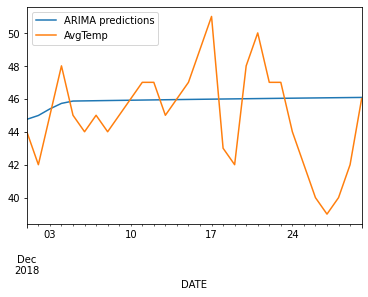

In [ ]:
pred.plot(legend=True)
test1['AvgTemp'].plot(legend=True)